## Fuel amount prediction using linear regression

## Joshua E

## 225229117

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
#step 1
p1=pd.read_csv(r'fueldata.csv')
p1

,drivenkm,fuelamount
0,390.00,3600.0
1,403.00,3705.0
2,396.50,3471.0
3,383.50,3250.5
4,321.10,3263.7
5,391.30,3445.2
6,386.10,3679.0
7,371.80,3744.5
8,404.30,3809.0
9,392.20,3905.0


In [8]:
#step 2
p1.head()

,drivenkm,fuelamount
0,390.0,3600.0
1,403.0,3705.0
2,396.5,3471.0
3,383.5,3250.5
4,321.1,3263.7


In [9]:
p1.shape

(19, 2)

In [10]:
p1.ndim

2

In [11]:
p1.info

<bound method DataFrame.info of     drivenkm  fuelamount
0     390.00      3600.0
1     403.00      3705.0
2     396.50      3471.0
3     383.50      3250.5
4     321.10      3263.7
5     391.30      3445.2
6     386.10      3679.0
7     371.80      3744.5
8     404.30      3809.0
9     392.20      3905.0
10    386.43      3874.0
11    395.20      3910.0
12    381.00      4020.7
13    372.00      3622.0
14    397.00      3450.5
15    407.00      4179.0
16    372.40      3454.2
17    375.60      3883.8
18    399.00      4235.9>

In [12]:
type(p1)

pandas.core.frame.DataFrame

In [13]:
p1.columns

Index(['drivenkm', 'fuelamount'], dtype='object')

In [14]:
#step 3
p1.isnull()

,drivenkm,fuelamount
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

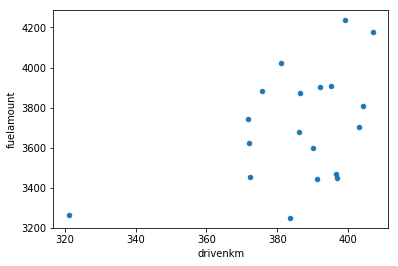

In [16]:
#step 4
p1.plot(kind='scatter',x='drivenkm',y='fuelamount')
plt.show()

In [17]:
#step 5
X=pd.DataFrame(p1['drivenkm'])
y=pd.DataFrame(p1['fuelamount'])

In [18]:

X

,drivenkm
0,390.00
1,403.00
2,396.50
3,383.50
4,321.10
5,391.30
6,386.10
7,371.80
8,404.30
9,392.20


In [19]:
y

,fuelamount
0,3600.0
1,3705.0
2,3471.0
3,3250.5
4,3263.7
5,3445.2
6,3679.0
7,3744.5
8,3809.0
9,3905.0


In [20]:
#step 6
type(X)
type(y)

pandas.core.frame.DataFrame

In [21]:
#step 7
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [22]:
X_train.shape

(15, 1)

In [23]:
y_train.shape

(15, 1)

In [24]:
X_test.shape

(4, 1)

In [25]:
y_test.shape


(4, 1)

## Part-1: Linear Regression Baseline Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
#step 8
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#step 9
pred_800_KM=reg.predict([[800]])
print("Deisel price for 800KM:",pred_800_KM[0])

Deisel price for 800KM: [6905.64571567]


In [29]:
#step 10
y_pred=reg.predict(X_test)
y_pred

array([[3775.81615646],
       [3785.74000628],
       [3815.51155575],
       [3875.05465468]])

In [30]:
#step 11
import sklearn.metrics as metrics
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("\n")
print("Model parameters:")
print("coefficient:",reg.coef_)
print("Intercept:",reg.intercept_)

MSE:  46181.36710639155
R2:  -0.6180990161577022


Model parameters:
coefficient: [[7.63373063]]
Intercept: [798.6612099]


## Part-II Linear Regression Model with Scaling using StandardScalar

In [31]:
#step 12
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_X_train=ss.fit_transform(X_train)
ss_X_train

array([[ 1.0601947 ],
       [-0.5322439 ],
       [ 0.02186483],
       [-0.55221178],
       [ 1.19497791],
       [-0.37250084],
       [ 0.670821  ],
       [ 0.45616627],
       [ 0.79562026],
       [-3.09312478],
       [-0.10293443],
       [-0.56219572],
       [ 0.16812957],
       [ 0.69578085],
       [ 0.15165606]])

In [32]:

ss_X_test=ss.transform(X_test)
ss_X_test

array([[0.34634292],
       [0.41123853],
       [0.60592538],
       [0.99529908]])

In [33]:
#step 13
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(ss_X_train,y_train)
ss_y_pred=lr.predict(ss_X_test)
ss_y_pred

array([[3775.81615646],
       [3785.74000628],
       [3815.51155575],
       [3875.05465468]])

In [34]:
#step 14
ss_mse=metrics.mean_squared_error(y_test,ss_y_pred)
ss_r2=metrics.r2_score(y_test,ss_y_pred)
print("SS_MSE: ",ss_mse)
print("SS_R2: ",ss_r2)

SS_MSE:  46181.36710639172
SS_R2:  -0.6180990161577082


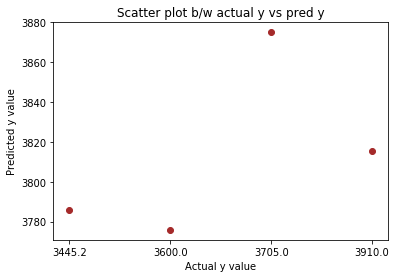

In [35]:
#step 15
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,y_pred,color='Brown',marker='o')
plt.title("Scatter plot b/w actual y vs pred y")
plt.xlabel('Actual y value')
plt.ylabel('Predicted y value')
plt.show()

## Part-III Linaer Regression with Scaling using MinMaxScalar and Comaprision with KNeighboursRegreseeor and SGDRegressor

In [36]:
#step 16
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm_X_train=mm.fit_transform(X_train)
mm_X_test=mm.transform(X_test)
mm_lr=LinearRegression()
mm_lr.fit(mm_X_train,y_train)
mm_y_pred=mm_lr.predict(mm_X_test)
print("Predictions of scaled data using MinMaxScaler:",mm_y_pred)

mm_mse=metrics.mean_squared_error(y_test,mm_y_pred)
mm_r2=metrics.r2_score(y_test,mm_y_pred)
print("MM_MSE: ",mm_mse)
print("MM_R2: ",mm_r2)

Predictions of scaled data using MinMaxScaler: [[3775.81615646]
 [3785.74000628]
 [3815.51155575]
 [3875.05465468]]
MM_MSE:  46181.3671063917
MM_R2:  -0.6180990161577073


In [37]:
#step 17
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
knr_y_pred=knr.predict(X_test)
print("Predictions of scaled data using KNeighborsRegressor:",knr_y_pred)
knr_mse=metrics.mean_squared_error(y_test,knr_y_pred)
knr_r2=metrics.r2_score(y_test,knr_y_pred)
print("KNR_MSE: ",knr_mse)
print("KNR_R2: ",knr_r2)

Predictions of scaled data using KNeighborsRegressor: [[3635.9 ]
 [3675.9 ]
 [3787.28]
 [3829.08]]
KNR_MSE:  21241.836200000045
KNR_R2:  0.2557302563733307


In [48]:
#step 18
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(X_train, y_train)
sgd_y_pred=sgd.predict(X_test)
print("Predictions of scaled data using SGDRegressor:", sgd_y_pred)
sgd_mse=metrics.mean_squared_error(y_test, sgd_y_pred)
sgd_r2=metrics.r2_score(y_test, sgd_y_pred)
print("SGD_MSE:",sgd_mse)
print("SGD_R2:",sgd_r2)

Predictions of scaled data using SGDRegressor: [2.05752787e+14 2.06438632e+14 2.08496167e+14 2.12611235e+14]
SGD_MSE: 4.340632681395667e+28
SGD_R2: -1.5208673781976945e+24


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#step 19
data_mse = {'lr_mse':[46181.36710639157],
            'ss_mse':[46181.36710639172],
            'mm_mse':[46181.36710639165],
            'knr_mse':[21241.836200000045],
            'sgd_mse':[1.1221718443614637e+29]}
def best_model(data_mse):
    # Calculating the lowest MSE
    mse_min = min(data_mse.values())
    # Storing the lowest MSE in result
    result = [key for key in data_mse if data_mse[key] == mse_min]
    Model_name = []
    if result == ['lr_mse']:
        a = 'LinearRegression'
        Model_name.append(a)
    elif result == ['ss_mse']:
        b = 'StandardScaler'
        Model_name.append(b)
    elif result == ['mm_mse']:
        c = 'MinMaxScaler'
        Model_name.append(c)
    elif result == ['knr_mse']:
        d = 'KNeighborsRegressor'
        Model_name.append(d)
    elif result == ['sgd_mse']:
        e = 'SGDRegressor'
        Model_name.append(e)
        # Printing the result
    print("The best model with the lowest MSE to be selected is", Model_name)
best_model(data_mse)

The best model with the lowest MSE to be selected is ['KNeighborsRegressor']
